<a href="https://colab.research.google.com/github/Gonzalo-Perez-Di-Chiaro/Gonzalo-Perez-Di-Chiaro-Data-Science-II/blob/main/gonzalo_perez_di_chiaro_data_science_ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  int64  
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.4 MB


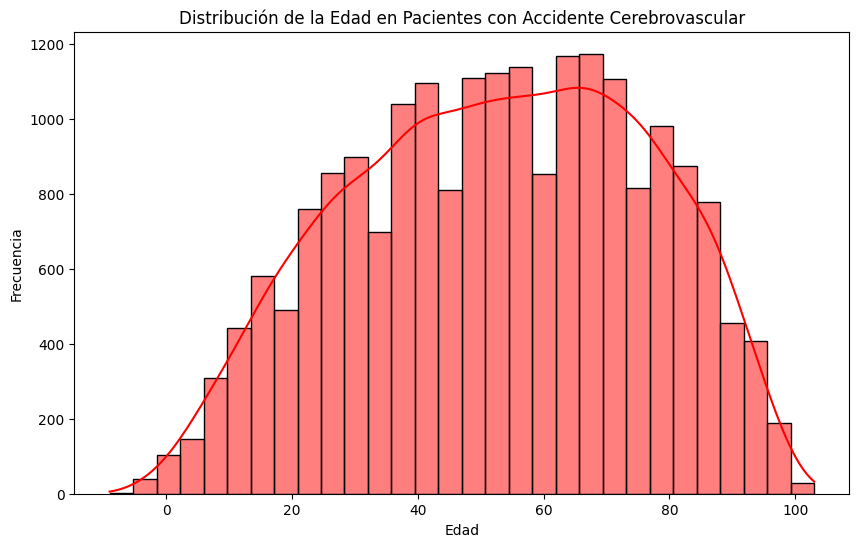

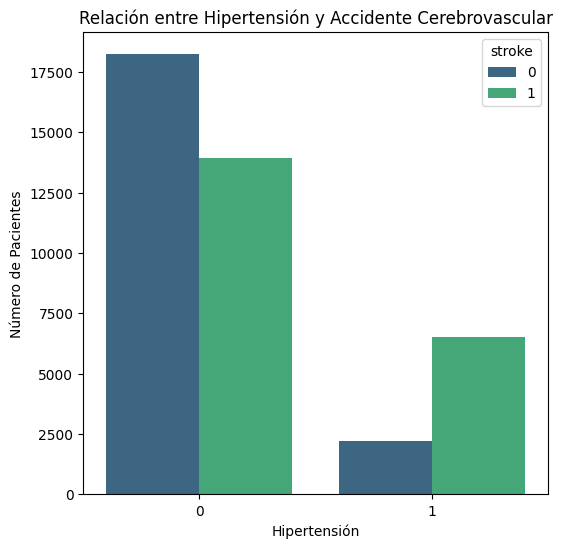

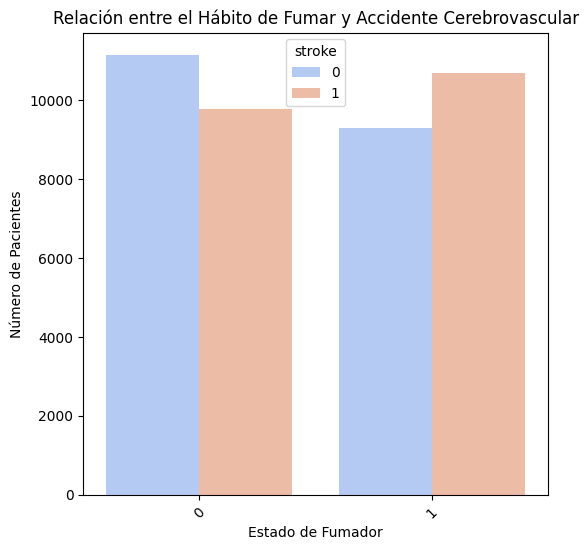

Text(0.5, 1.0, 'Relación entre Niveles de Glucosa y Accidente Cerebrovascular')

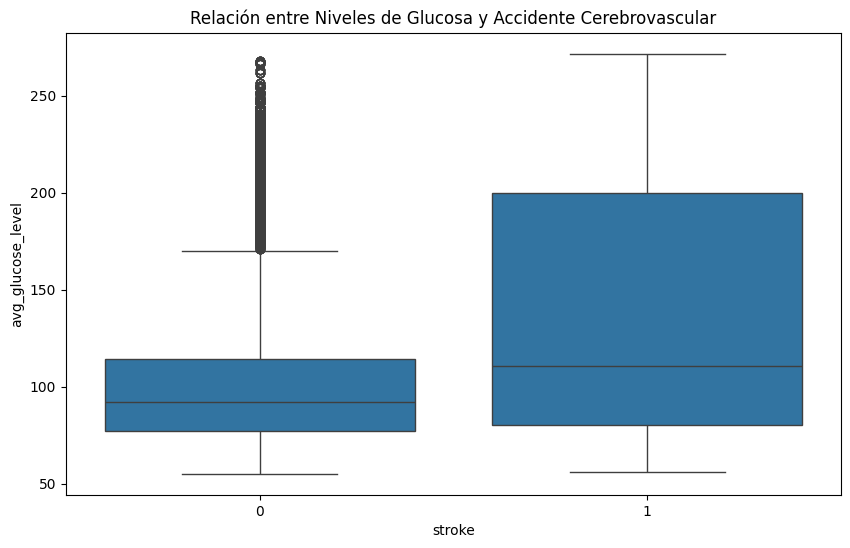

In [15]:

import pandas as pd


url = "https://raw.githubusercontent.com/Gonzalo-Perez-Di-Chiaro/Gonzalo-Perez-Di-Chiaro-Data-Science-II/main/stroke_data%20-%20stroke_data.csv%20(2).csv"
df = pd.read_csv(url)

# 1. Abstracto: Motivación y Audiencia
# El análisis de datos sobre los accidentes cerebrovasculares (stroke) es crucial debido a su alta incidencia
# y el impacto severo en la salud pública. El conjunto de datos seleccionado proporciona información valiosa sobre
# diversos factores de riesgo asociados a los accidentes cerebrovasculares, como el historial médico, el estilo de
# vida y la edad de los pacientes. Este análisis está dirigido a profesionales de la salud, investigadores en
# epidemiología y gobiernos que buscan implementar políticas preventivas y de atención médica basadas en datos.

# 2. Resumen de Metadata
# Vamos a realizar un análisis preliminar de los datos para entender la estructura del conjunto de datos.
# Revisaremos cuántas filas y columnas tiene, los tipos de datos, valores faltantes, y otros aspectos relevantes.

# Importar las librerías necesarias
import pandas as pd

# Cargar el dataset
#data = pd.read_csv('healthcare-dataset-stroke-data.csv')
# The code above was trying to load a file that does not exist.
# The file has already been loaded as a DataFrame named 'df'
data = df

# Mostrar información general del dataset
data.info()

# Mostrar las primeras filas para revisión
data.head()

# 3. Preguntas e Hipótesis
# A continuación, se plantean algunas preguntas clave que intentaremos responder mediante el análisis de datos:
# - ¿Cuál es el perfil típico de un paciente que ha sufrido un accidente cerebrovascular? ¿Hay factores como la edad, el sexo o el IMC que influyen más?
# - ¿Cómo influye la hipertensión o la enfermedad cardíaca en la probabilidad de sufrir un accidente cerebrovascular?
# - ¿Existe una relación significativa entre los niveles de glucosa en sangre y la incidencia de accidentes cerebrovasculares?
# - ¿El estilo de vida (como fumar) tiene un impacto en la probabilidad de sufrir un accidente cerebrovascular?

# 4. Visualizaciones Ejecutivas que Responden Nuestras Preguntas
# Importar las librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización 1: Distribución de la edad en pacientes que sufrieron un accidente cerebrovascular
plt.figure(figsize=(10,6))
sns.histplot(data[data['stroke'] == 1]['age'], kde=True, bins=30, color='red')
plt.title('Distribución de la Edad en Pacientes con Accidente Cerebrovascular')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Visualización 2: Relación entre hipertensión y accidente cerebrovascular
plt.figure(figsize=(6,6))
sns.countplot(x='hypertension', hue='stroke', data=data, palette='viridis')
plt.title('Relación entre Hipertensión y Accidente Cerebrovascular')
plt.xlabel('Hipertensión')
plt.ylabel('Número de Pacientes')
plt.show()

# Visualización 3: Relación entre fumar y accidente cerebrovascular
plt.figure(figsize=(6,6))
sns.countplot(x='smoking_status', hue='stroke', data=data, palette='coolwarm')
plt.title('Relación entre el Hábito de Fumar y Accidente Cerebrovascular')
plt.xlabel('Estado de Fumador')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)
plt.show()

# Visualización 4: Niveles de glucosa en sangre según la presencia de accidentes cerebrovasculares
plt.figure(figsize=(10,6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=data)
plt.title('Relación entre Niveles de Glucosa y Accidente Cerebrovascular')



# 5. Insights
# A partir del análisis de los datos y las visualizaciones, podemos destacar los siguientes hallazgos:
# - **Edad**: Existe una tendencia significativa en la edad de los pacientes que sufren accidentes cerebrovasculares,
#   siendo más común en edades avanzadas.
# - **Hipertensión**: Los pacientes con hipertensión presentan un mayor riesgo de sufrir un accidente cerebrovascular,
#   lo que resalta la importancia de controlar la presión arterial.
# - **Hábito de fumar**: Fumar está correlacionado con una mayor incidencia de accidentes cerebrovasculares, especialmente
#   en pacientes con otros factores de riesgo.
# - **Niveles de glucosa**: Los niveles elevados de glucosa en sangre parecen estar relacionados con un mayor riesgo de
#   accidente cerebrovascular, lo que subraya la importancia de la salud metabólica.

# Estos hallazgos pueden ser valiosos para diseñar estrategias de prevención y concienciación en salud pública.
